# Demo of my version of micrograd

stored in micrograd folder


In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP
from micrograd.draw_dot import draw_dot

In [10]:
#initializing random seed
np.random.seed(1)
random.seed(1)

# makign a dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples = 100, noise = 0.1)

y = y*2 - 1 #makes y -1 or 1
## WHY KARPATHY 

# visualize
#plt.scatter(X[:,0],X[:,1],c = y, s = 20, cmap = "jet")

In [11]:
#initialize network and inputs and ygt
test_nn = MLP(3,[10,10,1])

#draw_dot(nn(x))

xs = [
    [2.0,3.0,-1.0],
    [3.0,-1.0,0.5],
    [0.5,1.0,1.0],
    [1.0,1.0,-1.0]
]

ys = [1.0,0.0,0.0,1.0] #desired targets

epochs = 80
for k in range(epochs):
    #forward pass
    ypred = [ test_nn(x) for x in xs]
    loss = sum(((yout - ygt)**2 for yout, ygt in zip(ypred,ys)))

    # I WAS RIGHT - NEED TO ZERO_GRAD() before backward pass
    for p in test_nn.parameters():
        p.grad = 0.0

    #backward pass
    loss.backward()

    # update
    for p in test_nn.parameters():
        step_size = 0.001
        p.data += -step_size * p.grad

    #print results
    print(k,loss.data)

ypred

0 27.832372835026536
1 16.48837460499596
2 10.339248898137164
3 6.710474124432117
4 4.447066763856368
5 2.9913744960320225
6 2.036247456028378
7 1.4007702217056026
8 0.9735050291396856
9 0.6837249303789971
10 0.48562913516179473
11 0.3491485794336232
12 0.25435075975811294
13 0.18792735439385294
14 0.14094127606841966
15 0.10736012019910486
16 0.08309187038693883
17 0.06534640976295089
18 0.0522106176563234
19 0.04236449356896772
20 0.03489086732649991
21 0.02914744233481157
22 0.02468047754603579
23 0.021166355799915902
24 0.01837187482499159
25 0.0161271412387541
26 0.01430697252932487
27 0.01281806131113981
28 0.011590056914186003
29 0.01056932166009953
30 0.009714522560786401
31 0.008993489820169134
32 0.008380955470680103
33 0.007856908081326618
34 0.007405382310592378
35 0.007013558218558367
36 0.00667108343906658
37 0.00636955739588039
38 0.0061021346496277365
39 0.005863216819347562
40 0.005648211106386756
41 0.005453339454626591
42 0.0052754866178161145
43 0.005112078420265633

[Value(data=0.9861228385956209),
 Value(data=-0.006891978049604161),
 Value(data=0.006198001435615247),
 Value(data=1.0445157037322208)]

In [21]:
model = MLP(2, [16, 16, 1])
print(model)

In [23]:
# define loss function

def loss(batch_size = None):

    #inline DataLoader
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb,yb = X[ri], y[ri]

    inputs = [list(map(Value,xrow)) for xrow in Xb] #turns all of the inputs into Value objects

    #forward the mode to get scores

    scores = list(map(model, inputs)) #more python way of iterating over each element in the input list

    # svm "max-margin" LOSS
    losses = [(1 + -yi*scorei).relu() for yi,scorei in zip(yb,scores)]
    data_loss = sum(losses) * (1.0 / len(losses)) #takes average of loss

    #L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters())) #L**2 term
    total_loss = data_loss + reg_loss 

    #can also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi,scorei in zip(yb,scores)]
    
    #return both
    return total_loss, sum(accuracy)/len(accuracy)

total_loss,acc = loss(batch_size = 20)

print(total_loss,acc)

#draw_dot(total_loss)


Value(data=0.5881602992969255) 0.6


In [24]:
# optimization

for k in range(100):
    #forward
    total_loss, acc = loss()

    #backward
    model.zero_grad()
    total_loss.backward()

    #update (sgd) with learning
    learning_rate = 1.0 - (0.9*k/100)
    for p in model.parameters():
        p.data -= learning_rate * p.grad

    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 0.46966500735052974, accuracy 77.0%
step 1 loss 0.388289587956176, accuracy 87.0%
step 2 loss 1.2607055626227057, accuracy 67.0%
step 3 loss 1.5229120592231427, accuracy 56.00000000000001%
step 4 loss 1.4333547745806876, accuracy 81.0%
step 5 loss 0.39827431118808926, accuracy 82.0%
step 6 loss 0.33605444539449286, accuracy 89.0%
step 7 loss 0.4991512484484738, accuracy 87.0%
step 8 loss 0.2946184916063875, accuracy 87.0%
step 9 loss 0.21900002293404194, accuracy 89.0%
step 10 loss 0.2230741005921613, accuracy 95.0%
step 11 loss 0.24055875413062333, accuracy 90.0%
step 12 loss 0.28747606041221624, accuracy 92.0%
step 13 loss 0.1970215847649442, accuracy 91.0%
step 14 loss 0.17793593522622586, accuracy 96.0%
step 15 loss 0.19564307506096706, accuracy 93.0%
step 16 loss 0.25607595536425926, accuracy 92.0%
step 17 loss 0.15608148210646355, accuracy 93.0%
step 18 loss 0.09950755151131943, accuracy 97.0%
step 19 loss 0.09453831427144035, accuracy 98.0%
step 20 loss 0.18027481324

(-1.7609251085622153, 1.9890748914377847)

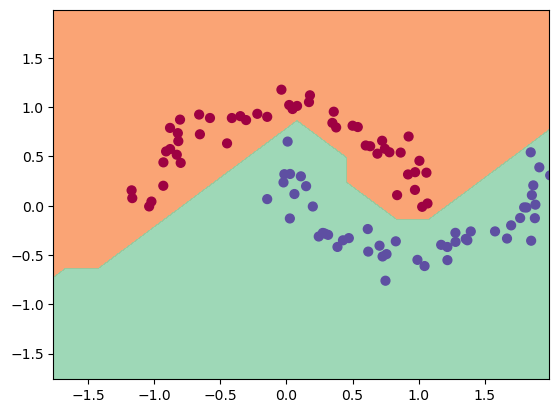

In [25]:
#visualising the decision boundary

h = 0.25 #arange step size
x_min, x_max = X[:,0].min() -1, X[:,0].max()+1
y_min, y_max = X[:,1].min() -1, X[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min,x_max, h ),
                    np.arange(y_min,y_max,h))

Xmesh = np.c_[xx.ravel(), yy.ravel()] # 2 columns of all the possible x and y values
inputs = [list(map(Value,xrow)) for xrow in Xmesh] #turns all the values into Value objects
scores = list(map(model,inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap = plt.cm.Spectral, alpha = 0.8)
plt.scatter(X[:,0],X[:,1],c = y, s = 40, cmap = plt.cm.Spectral)
plt.xlim(xx.min(),xx.max())
plt.xlim(yy.min(),yy.max())